In [12]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [45]:
df = web.DataReader('AAPL', data_source = 'yahoo', start='2020-01-01', end='2020-07-05') 

In [46]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.779999
2020-06-30,365.980011,360.000000,360.079987,364.799988,35055800.0,364.799988
2020-07-01,367.359985,363.910004,365.119995,364.109985,27684300.0,364.109985
2020-07-02,370.470001,363.640015,367.850006,364.109985,28510400.0,364.109985


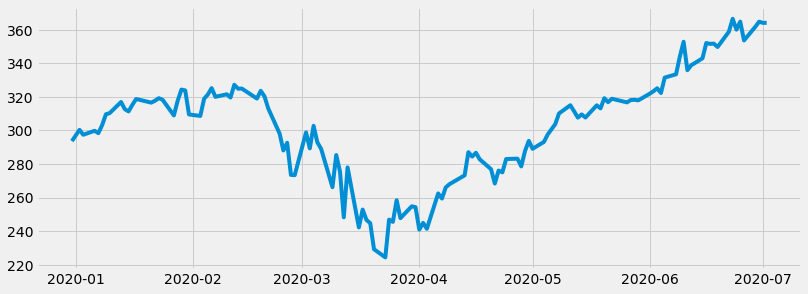

In [47]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df.index, df['Close'], label = 'Close Price')
plt.show()

#### MACD and Signal Line Indicators

In [48]:
ShortEMA = df.Close.ewm(span = 12, adjust = False).mean()
LongEMA = df.Close.ewm(span = 26, adjust = False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span = 9, adjust = False).mean()

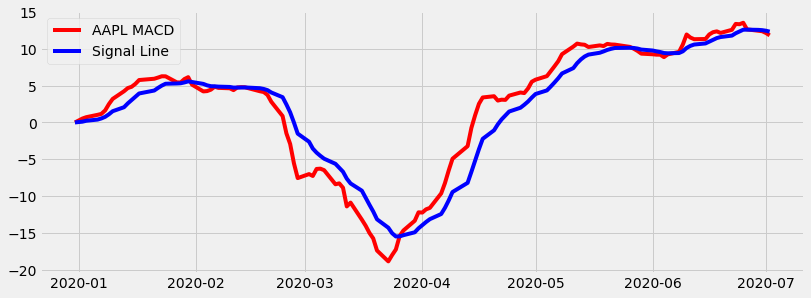

In [49]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df.index, MACD, label = "AAPL MACD", color = 'red')
plt.plot(df.index, signal, label = "Signal Line", color = 'blue')
plt.legend()
plt.show()

In [50]:
df['MACD'] = MACD
df['Signal Line'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400.0,292.163818,0.000000,0.000000
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,298.829956,0.534474,0.106895
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,295.924713,0.714195,0.228355
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,298.282715,1.035922,0.389868
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,296.879883,1.163706,0.544636
...,...,...,...,...,...,...,...,...
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005,12.656329,12.618184
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.779999,12.461046,12.586756
2020-06-30,365.980011,360.000000,360.079987,364.799988,35055800.0,364.799988,12.406951,12.550795


In [51]:
def buy_sell(signal):
    buy = []
    sell = []
    flag = -1
    
    for i in range(len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy, sell

In [52]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [53]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400.0,292.163818,0.000000,0.000000,NaN,NaN
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,298.829956,0.534474,0.106895,300.350006,NaN
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,295.924713,0.714195,0.228355,NaN,NaN
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,298.282715,1.035922,0.389868,NaN,NaN
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,296.879883,1.163706,0.544636,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005,12.656329,12.618184,NaN,NaN
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.779999,12.461046,12.586756,NaN,361.779999
2020-06-30,365.980011,360.000000,360.079987,364.799988,35055800.0,364.799988,12.406951,12.550795,NaN,NaN


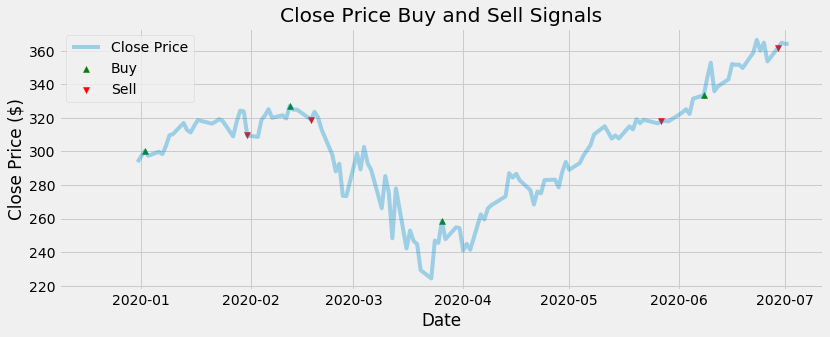

In [54]:
plt.figure(figsize = (12.2, 4.5))
plt.scatter(df.index, df["Buy_Signal_Price"], color = 'green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(df.index, df["Sell_Signal_Price"], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(df['Close'], label = 'Close Price', alpha = 0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()